In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
X = df.drop("sales",axis = 1)
y = df["sales"]

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converters = PolynomialFeatures(degree=2,include_bias=False)
polynomial_converters.fit(X)

PolynomialFeatures(include_bias=False)

In [7]:
poly_features = polynomial_converters.transform(X)

In [8]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
test_predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE  = mean_squared_error(y_test,test_predictions)

In [17]:
RMSE = np.sqrt(MSE)

In [18]:
MAE

0.4896798044803855

In [19]:
RMSE

0.6646431757269305

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
# create the differnet order poly
#split poly feat train/test
#fit on train
#store/save the rmse for Both the train and test
#plot the result (error vs poly order)

In [28]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit(X)
    poly_features = poly_features.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse  = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [29]:
train_rmse_errors


[1.7345941243293759,
 0.5879574085292231,
 0.4339344356902069,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.421422348088456,
 0.1424969455213967,
 0.1665207515517613]

In [30]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269305,
 0.5803286825177236,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.4040685804796,
 4449.567305745858,
 95891.23715810999]

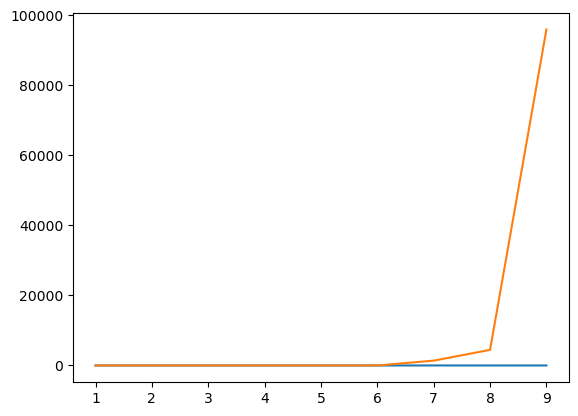

In [34]:
plt.plot(range(1,10),train_rmse_errors, label="TRAIN RMSE")
plt.plot(range(1,10),test_rmse_errors, label="TEST RMSE")

In [60]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()

In [61]:
full_converted_X = final_poly_converter.fit_transform(X)

In [62]:
final_model.fit(full_converted_X,y)

LinearRegression()

In [63]:
from joblib import dump,load

In [64]:
dump(final_model,"final_poly_model.joblib")

['final_poly_model.joblib']

In [65]:
dump(final_poly_converter, "final_converter.joblib")

['final_converter.joblib']

In [66]:
loaded_converter = load("final_converter.joblib")
loaded_model = load("final_poly_model.joblib")

In [67]:
campaign = [[149,22,12]]

In [68]:
transformed_data = loaded_converter.fit_transform(campaign)

In [69]:
loaded_model.predict(transformed_data)

array([14.64501014])